In [35]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

### 자전거 데이터 확인

In [36]:
bike_df = pd.read_csv('./train_bike.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


#### null 값 확인 : 없음

In [37]:
print(bike_df.info())    # datetime => 년,월,일,시 각각 분해해서 데이터분석 필요 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


### 데이터 타입 변경,삭제

In [38]:
#문자열을 datetime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

#datetime 타입에서 년,월,일,시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x :x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)

bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [39]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

#### data type 보고 불필요한 목록 삭제
- casual : 사전에 등록하지 않은 사람이 대여
- registered : 등록한 사람이 대여 

In [40]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

### 에러 함수들 정의 후 선형회귀 학습/예측

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
# log 값 반환 시 NaN 등 log() 가 아닌 log1p()을 이용하여 RMSLE 계산

def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle
    
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    
    print(f'RMSLE:{rmsle_val:.3f},RMSE:{rmse_val:.3f},MAE:{mae_val:.3f}')

#### 데이터 분리 

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_feature = bike_df.drop(['count'], axis=1,inplace=False)

X_train,X_test, y_train,y_test = train_test_split(X_feature,y_target,test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test,pred)
# RMSLE에 비해 RMSE가 너무 크게 나옴. 예측 에러가 매우 큰 값들이 섞여 있기 때문

RMSLE:1.165,RMSE:140.900,MAE:105.924


In [44]:
def get_top_error_data(y_test,pred,n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count']-result_df['predicted_count'])
    
    print(result_df.sort_values('diff',ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

# 실제값과 예측값의 차이 너무 큼 

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


Text(0.5, 1.0, 'AFTER')

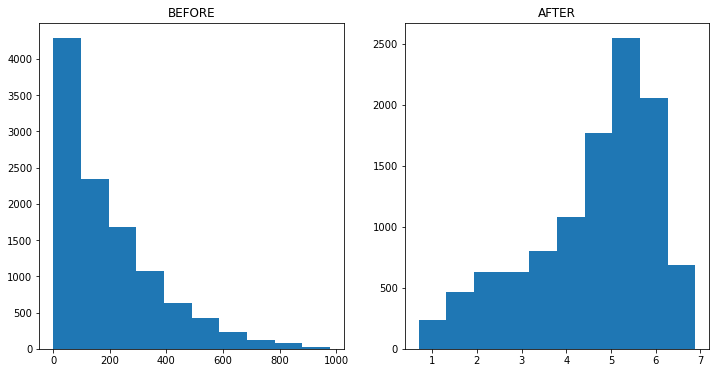

In [45]:
plt.figure(figsize=(12,6), facecolor='w')
plt.subplot(1,2,1)
plt.hist(y_target)
plt.title('BEFORE')

plt.subplot(1,2,2)
plt.hist(np.log1p(y_target))
plt.title('AFTER')

### 타겟값에 로그 취해서 정규화

In [46]:
# 타겟 컬럼(count) 값을 log1p로 log 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log 반영하여 학습/테스트
X_train,X_test, y_train,y_test = train_test_split(X_feature,y_target_log,test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)


# 테스트 데이터 셋의 target 값은 log변환되었으므로 다시  expm1를 이용하여 워래 scale 로 변환
y_test_exp = np.expm1(y_test)

#예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 expm1으로 scale 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp,pred_exp)
# 아직도 RMSE 값이 매우 큼

RMSLE:1.017,RMSE:162.594,MAE:109.286


### 피처 별 회귀 계수 확인

<AxesSubplot:>

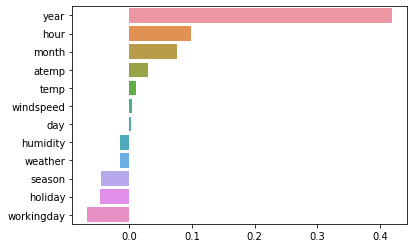

In [47]:
coef = pd.Series(lr_reg.coef_, index=X_feature.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

# year의 영향이 큰것은 해당 기업이 2011에 창업하여 2012 부터 더 성장해 수요가 증가함

### 원-핫 인코딩 후 다시 학습/예측

In [48]:
X_feature_ohe = pd.get_dummies(X_feature,columns=['year','month','hour','holiday','workingday','season','weather'])

In [62]:
X_train,X_test, y_train,y_test = train_test_split(X_feature_ohe,y_target_log,test_size=0.3, random_state=1)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)
# end of function get_model_predict

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE:0.583,RMSE:95.515,MAE:62.686
### Ridge ###
RMSLE:0.585,RMSE:96.552,MAE:63.369
### Lasso ###
RMSLE:0.636,RMSE:112.394,MAE:72.944


<AxesSubplot:>

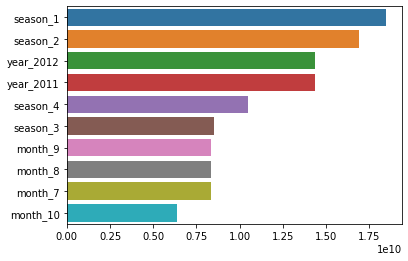

In [63]:
coef = pd.Series(lr_reg.coef_ , index=X_feature_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
plt.figure(facecolor='w')
sns.barplot(x=coef_sort.values, y=coef_sort.index)